In [1]:
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")

from qtcipy import interpolate

In [6]:
import pyqula

In [ ]:
pyqula.kpm

In [5]:
complex(1+3j)

(1+3j)

In [ ]:
from pyqula.kpmtk.density import get_density

# Supermoire
Let us the QTCI algorithm for a supermoire potential

In [16]:
import numpy as np


def f(x):
    k1 = 34
    k2 = 214
    k3 = 2203
    o = np.cos(2*np.pi*k1*x) 
    o += 1.5*np.cos(2*np.pi*k2*x)
    o += 2*np.cos(2*np.pi*k3*x) 
    return o**2



In [68]:
# sample the function with QTCI

xlim = [0.,1.]


# create the interpolator
IP = interpolate.Interpolator(f,tol=1e-2,nb=20,xlim=xlim,dim=1)



# check the evaluated points as a reference
rse,zse = IP.get_evaluated()
print(len(rse),"evaluations")
rse = np.array(rse)


# evaluate the function and the interpolation
nn = 10000
xs = np.linspace(xlim[0],xlim[1],nn,endpoint=False)
ysi = [IP(x) for x in xs]
ys = [f(x) for x in xs]


7011 evaluations


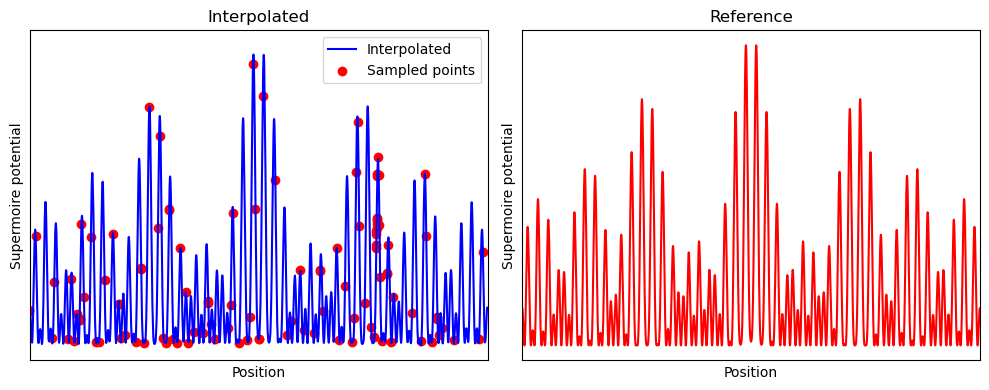

In [69]:
nn = 10000
xs = np.linspace(0.49,0.51,nn,endpoint=False)
ysi = [IP(x) for x in xs]
ys = [f(x) for x in xs]

# now plot the data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Interpolated")
plt.plot(xs,ysi,c="blue",label="Interpolated")
plt.scatter(rse,zse,c="red",label="Sampled points")
plt.legend()
plt.xlim([min(xs),max(xs)])
plt.xticks([]) ; plt.yticks([])
plt.xlabel("Position") ; plt.ylabel("Supermoire potential")

plt.subplot(1,2,2)
plt.title("Reference")
plt.plot(xs,ys,c="red")
plt.xticks([]) ; plt.yticks([])
plt.xlabel("Position") ; plt.ylabel("Supermoire potential")
plt.xlim([min(xs),max(xs)])

plt.tight_layout()


In [63]:
# sample the function with QTCI
def get_np(L):
    xlim = [0.,L]

    nb = 20 + int(np.round(np.log(L))) # required number of bits
#    print(nb)
    # create the interpolator
    IP = interpolate.Interpolator(f,tol=1e-1,nb=nb,xlim=xlim,dim=1)



    # check the evaluated points as a reference
    rse,zse = IP.get_evaluated()
    return len(rse)

Ls = np.linspace(1,100,20)
ntries = 50
ps = [np.mean([get_np(L) for i in range(ntries)]) for L in Ls]

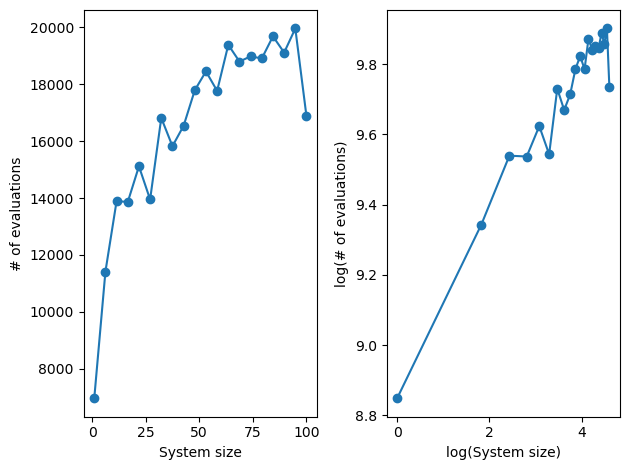

In [64]:
plt.subplot(1,2,1)
plt.plot(Ls,ps,marker="o")
plt.xlabel("System size") ; plt.ylabel("# of evaluations")

plt.subplot(1,2,2)
plt.plot(np.log(Ls),np.log(ps),marker="o")
plt.xlabel("log(System size)") ; plt.ylabel("log(# of evaluations)")

plt.tight_layout()